In [8]:
import pandas as pd
import numpy as np
import json


This demo uses sample files pulled from Open Target Platform data hosted on Google Big Query, details here: https://platform-docs.opentargets.org/data-access/google-bigquery

Column names are the same on FTP files pulled from below, though the structure of the data is different.
http://ftp.ebi.ac.uk/pub/databases/opentargets/platform/

# Pathways

In [4]:
# 66k out of 83k rows of pathways data from OpenTargets
f = open('bquxjob_40932c30_1875bdda235.json')
data = json.load(f)
len(data),data[:5]

(66066,
 [{'targetId': 'ENSG00000126934',
   'list': [{'element': {'id': 'R-HSA-6802955',
      'name': 'Paradoxical activation of RAF signaling by kinase inactive BRAF'}}]},
  {'targetId': 'ENSG00000078304',
   'list': [{'element': {'id': 'R-HSA-5358752',
      'name': "CTNNB1 T41 mutants aren't phosphorylated"}}]},
  {'targetId': 'ENSG00000239713',
   'list': [{'element': {'id': 'R-HSA-180585',
      'name': 'Vif-mediated degradation of APOBEC3G'}}]},
  {'targetId': 'ENSG00000121879',
   'list': [{'element': {'id': 'R-HSA-5655291',
      'name': 'Signaling by FGFR4 in disease'}}]},
  {'targetId': 'ENSG00000091137',
   'list': [{'element': {'id': 'R-HSA-5619046',
      'name': 'Defective SLC26A4 causes Pendred syndrome (PDS)'}}]}])

In [5]:
# explore structure, identify pieces we want

for i in data[:1]:
    print(i['targetId'])
    for j in i['list']:
        print(j['element']['id'])

ENSG00000126934
R-HSA-6802955


In [14]:
# read json into dict of target ID and phenotype IDs

targets = {}
for i in data:
    for j in i['list']:
        if i['targetId'] in targets.keys():
            targets[i['targetId']].add(j['element']['id'])
        else:
            targets[i['targetId']] = set()
            targets[i['targetId']].add(j['element']['id'])

# 6293 targets, with multiple pathways matched to each
len(targets.keys()), targets['ENSG00000126934']

(6293,
 {'R-HSA-111463',
  'R-HSA-112412',
  'R-HSA-1222499',
  'R-HSA-1266695',
  'R-HSA-157052',
  'R-HSA-162906',
  'R-HSA-166187',
  'R-HSA-171319',
  'R-HSA-1799339',
  'R-HSA-2500257',
  'R-HSA-2990846',
  'R-HSA-3065678',
  'R-HSA-3359454',
  'R-HSA-383280',
  'R-HSA-389661',
  'R-HSA-450520',
  'R-HSA-512988',
  'R-HSA-5210891',
  'R-HSA-5358565',
  'R-HSA-5358749',
  'R-HSA-5654227',
  'R-HSA-5658034',
  'R-HSA-5674135',
  'R-HSA-6802946',
  'R-HSA-6802948',
  'R-HSA-6802952',
  'R-HSA-6802955',
  'R-HSA-8850843',
  'R-HSA-8876493',
  'R-HSA-9649948',
  'R-HSA-9652169'})

In [15]:
%%time
def jaccard(first, second):
    return len(set(first).intersection(second)) / len(set(first).union(second))

keys = list(targets.keys())
result_dict = {}

for k in keys:
    for l in keys:
        result_dict[(k,l)] = result_dict.get((l,k), jaccard(targets[k], targets[l]))

Wall time: 1min 30s


In [16]:
len(targets.keys()),len(result_dict.keys())

(6293, 39601849)

Text(0.5, 1.0, 'Histogram of similarity between targets based on Pathways')

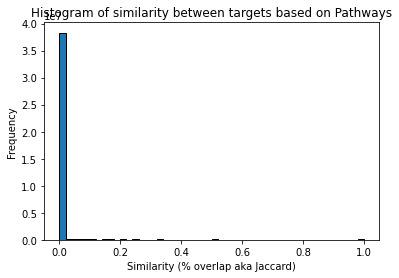

In [17]:
from matplotlib import pyplot as plt
plt.hist(result_dict.values(), bins=50, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Similarity (% overlap aka Jaccard)')
plt.title('Histogram of similarity between targets based on Pathways')

# GWAS

In [9]:
# only 145k out of 1.8 billion rows...
f = open('bquxjob_6297f865_1875bf380ae.json')
gwas = json.load(f)
len(gwas),gwas[:5]

(145305,
 [{'gene_id': 'ENSG00000263465',
   'trait_reported': 'Mean corpuscular volume',
   'pval': '1e-28'},
  {'gene_id': 'ENSG00000164761',
   'trait_reported': 'Platelet count',
   'pval': '6.31912e-10'},
  {'gene_id': 'ENSG00000123106',
   'trait_reported': 'Cortical surface area',
   'pval': '1e-17'},
  {'gene_id': 'ENSG00000205116',
   'trait_reported': 'Serum levels of protein NADK',
   'pval': '1e-17'},
  {'gene_id': 'ENSG00000116667',
   'trait_reported': 'Leg fat percentage (left)',
   'pval': '3.44e-12'}])

In [10]:
# explore structure, identify pieces we want

for i in gwas[:1]:
    print(i['gene_id'])
    print(i['trait_reported'])
    print(i['pval'])
    

ENSG00000263465
Mean corpuscular volume
1e-28


In [11]:
# read json into dict of target ID and phenotype IDs
# limit to just 10k records so I don't crash my machine

targets = {}
for i in gwas[:10000]:
    if i['gene_id'] in targets.keys():
        targets[i['gene_id']].add(i['trait_reported'])
    else:
        targets[i['gene_id']] = set()
        targets[i['gene_id']].add(i['trait_reported'])

# 13696 targets total, reduced to just 3946 here, with multiple traits matched to each
len(targets.keys()), targets['ENSG00000263465']

(3946, {'Mean corpuscular volume'})

In [12]:
%%time
def jaccard(first, second):
    return len(set(first).intersection(second)) / len(set(first).union(second))

keys = list(targets.keys())
result_dict = {}

for k in keys:
    for l in keys:
        if k != l:
            result_dict[(k,l)] = result_dict.get((l,k), jaccard(targets[k], targets[l]))
len(targets.keys()),len(result_dict.keys())

Wall time: 31.1 s


(3946, 15566970)

Text(0.5, 1.0, 'Histogram of similarity between targets based on GWAS')

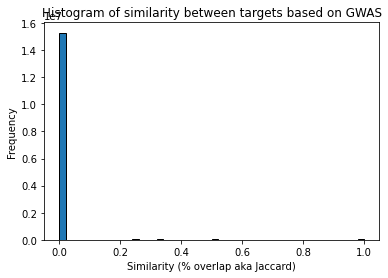

In [13]:
# View results
from matplotlib import pyplot as plt
plt.hist(result_dict.values(), bins=50, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Similarity (% overlap aka Jaccard)')
plt.title('Histogram of similarity between targets based on GWAS')

In [21]:
# filter out 0 similarity results
reduced_dict = {k:v for k,v in result_dict.items() if v > 0}
len(result_dict), len(reduced_dict)

(15566970, 306554)

In [22]:
# write results to file
import pickle

with open('GWAS_results.pickle', 'wb') as handle:
    pickle.dump(reduced_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Mouse Phenotypes

In [ ]:

# 38k out of 195k rows on mouse phenotypes from open targets
f = open('bquxjob_4f2720b3_186bef34b13.json')
data = json.load(f)
data

[{'modelPhenotypeClasses': {'list': [{'element': {'id': 'MP:0005376',
      'label': 'homeostasis/metabolism phenotype'}},
    {'element': {'id': 'MP:0005385',
      'label': 'cardiovascular system phenotype'}}]},
  'targetInModelEnsemblId': 'ENSMUSG00000062327'},
 {'modelPhenotypeClasses': {'list': [{'element': {'id': 'MP:0005382',
      'label': 'craniofacial phenotype'}},
    {'element': {'id': 'MP:0005378',
      'label': 'growth/size/body region phenotype'}}]},
  'targetInModelEnsemblId': 'ENSMUSG00000062327'},
 {'modelPhenotypeClasses': {'list': [{'element': {'id': 'MP:0005380',
      'label': 'embryo phenotype'}},
    {'element': {'id': 'MP:0005371',
      'label': 'limbs/digits/tail phenotype'}}]},
  'targetInModelEnsemblId': 'ENSMUSG00000062327'},
 {'modelPhenotypeClasses': {'list': [{'element': {'id': 'MP:0005380',
      'label': 'embryo phenotype'}},
    {'element': {'id': 'MP:0003631', 'label': 'nervous system phenotype'}},
    {'element': {'id': 'MP:0005390', 'label': 'ske

In [ ]:
# explore structure, identify pieces we want

for i in data[:1]:
    print(i['targetInModelEnsemblId'])
    for j in i['modelPhenotypeClasses']['list']:
        print(j['element']['id'])


ENSMUSG00000062327
MP:0005376
MP:0005385


In [ ]:
# read json into dict of target ID and phenotype IDs

targets = {}
for i in data:
    for j in i['modelPhenotypeClasses']['list']:
        if i['targetInModelEnsemblId'] in targets.keys():
            targets[i['targetInModelEnsemblId']].add(j['element']['id'])
        else:
            targets[i['targetInModelEnsemblId']] = set()
            targets[i['targetInModelEnsemblId']].add(j['element']['id'])
targets

{'ENSMUSG00000062327': ['MP:0005376',
  'MP:0005385',
  'MP:0005382',
  'MP:0005378',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0003631',
  'MP:0005390',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0003631',
  'MP:0003631'],
 'ENSMUSG00000027596': ['MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0005370',
  'MP:0005378',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0001186',
  'MP:0010771',
  'MP:0002006',
  'MP:0002006',
  'MP:0005367',
  'MP:0005367',
  'MP:0005367',
  'MP:0005367',
  'MP:0005367',
  'MP:0005367'],
 'ENSMUSG0

In [ ]:
%%time
def jaccard(first, second):
    return len(set(first).intersection(second)) / len(set(first).union(second))

keys = list(targets.keys())
result_dict = {}

for k in keys:
    for l in keys:
        result_dict[(k,l)] = result_dict.get((l,k), jaccard(targets[k], targets[l]))

CPU times: user 1min 17s, sys: 1.52 s, total: 1min 19s
Wall time: 1min 19s


In [ ]:
result_dict

{('ENSMUSG00000062327', 'ENSMUSG00000062327'): 1.0,
 ('ENSMUSG00000062327', 'ENSMUSG00000027596'): 0.07692307692307693,
 ('ENSMUSG00000062327', 'ENSMUSG00000046532'): 0.14285714285714285,
 ('ENSMUSG00000062327', 'ENSMUSG00000024164'): 0.1875,
 ('ENSMUSG00000062327', 'ENSMUSG00000003617'): 0.25,
 ('ENSMUSG00000062327', 'ENSMUSG00000027249'): 0.38461538461538464,
 ('ENSMUSG00000062327', 'ENSMUSG00000028128'): 0.3333333333333333,
 ('ENSMUSG00000062327', 'ENSMUSG00000026579'): 0.1111111111111111,
 ('ENSMUSG00000062327', 'ENSMUSG00000031443'): 0.2222222222222222,
 ('ENSMUSG00000062327', 'ENSMUSG00000031138'): 0.1111111111111111,
 ('ENSMUSG00000062327', 'ENSMUSG00000035540'): 0.1111111111111111,
 ('ENSMUSG00000062327', 'ENSMUSG00000020713'): 0.09090909090909091,
 ('ENSMUSG00000062327', 'ENSMUSG00000025059'): 0.1111111111111111,
 ('ENSMUSG00000062327', 'ENSMUSG00000031722'): 0.18181818181818182,
 ('ENSMUSG00000062327', 'ENSMUSG00000022096'): 0.1875,
 ('ENSMUSG00000062327', 'ENSMUSG00000024474

In [ ]:
len(targets.keys()),len(result_dict.keys())


(7049, 49688401)

Text(0.5, 1.0, 'Histogram of similarity between targets based on Mouse Phenotypes')

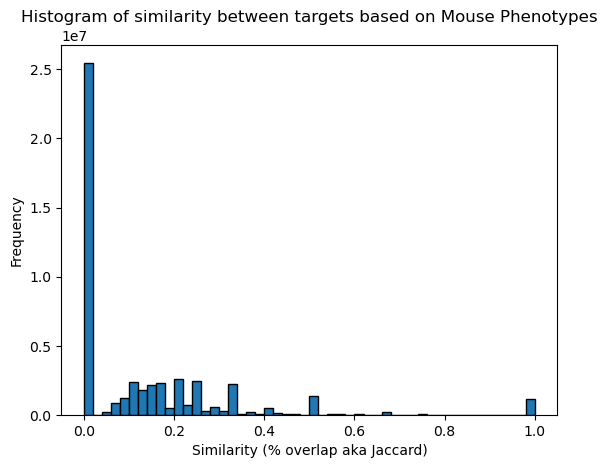

In [ ]:
from matplotlib import pyplot as plt
plt.hist(result_dict.values(), bins=50, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Similarity (% overlap aka Jaccard)')
plt.title('Histogram of similarity between targets based on Mouse Phenotypes')

In [ ]:
result_dict.values()

In [ ]:
# default implementation counts missing phenotypes as unmatched -- makes ordering of pairs unmeaningful
result_dict[('ENSMUSG00000062327','ENSMUSG00000031443')], result_dict[('ENSMUSG00000031443','ENSMUSG00000062327')]


(0.2222222222222222, 0.2222222222222222)

In [ ]:
targets['ENSMUSG00000062327'], targets['ENSMUSG00000031443']

(['MP:0005376',
  'MP:0005385',
  'MP:0005382',
  'MP:0005378',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0003631',
  'MP:0005390',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0003631',
  'MP:0003631'],
 ['MP:0005382', 'MP:0005378', 'MP:0002873'])

In [ ]:
targets['ENSMUSG00000062327'], targets['ENSMUSG00000027249'], result_dict[('ENSMUSG00000062327', 'ENSMUSG00000027249')]


(['MP:0005376',
  'MP:0005385',
  'MP:0005382',
  'MP:0005378',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0003631',
  'MP:0005390',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0005380',
  'MP:0005371',
  'MP:0003631',
  'MP:0003631'],
 ['MP:0005376',
  'MP:0005385',
  'MP:0005380',
  'MP:0005384',
  'MP:0005381',
  'MP:0005385',
  'MP:0005385',
  'MP:0005380',
  'MP:0005385',
  'MP:0003631',
  'MP:0005385',
  'MP:0010771',
  'MP:0005387',
  'MP:0005390',
  'MP:0002873'],
 0.38461538461538464)

# 